<a href="https://colab.research.google.com/github/w86w86/econ8310-assignment1/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1 - Forecast the # of taxi trips requested during each hour in a week

##Execution

###Upload the data and Format into Prophet column's name

In [1]:
file = "https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv"
#Import statements
import pandas as pd
import numpy as np
from prophet import Prophet

# Import the dataset of #of taxi trips each hour in New York City,
trip = pd.read_csv(file)

# Keep only the dates and the y value
trip = trip[['Timestamp','trips']]
print('->trip.Timestamp (before) dtype: ', trip.Timestamp.dtype)

# Format the date (Timestamp
trip.Timestamp = pd.to_datetime(trip.Timestamp)
print('->trip.Timestamp (after) dtype: ', trip.Timestamp.dtype)

# Prophet format using column ds and y
trip=trip.rename(columns={'Timestamp':'ds','trips':'y'})
trip.head()

->trip.Timestamp (before) dtype:  object
->trip.Timestamp (after) dtype:  datetime64[ns]


,ds,y
0,2018-01-01 00:00:00,16714
1,2018-01-01 01:00:00,19041
2,2018-01-01 02:00:00,16590
3,2018-01-01 03:00:00,12626
4,2018-01-01 04:00:00,8739


###Graphic Representation of all trips (hourly)

In [2]:
import plotly.express as px
fig = px.line(trip, x='ds', y='y')
fig.show()

###Initialize GAM/Prophet instance and fit to data / modelFit

In [3]:
%%time
modelFit = Prophet()
modelFit.fit(trip)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kjzm3hi/j8au81sb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kjzm3hi/oc3mh6up.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18191', 'data', 'file=/tmp/tmp2kjzm3hi/j8au81sb.json', 'init=/tmp/tmp2kjzm3hi/oc3mh6up.json', 'output', 'file=/tmp/tmp2kjzm3hi/prophet_modelgn0jvmm1/prophet_model-20250916094945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 331 ms, sys: 17 ms, total: 348 ms
Wall time: 1.22 s


###Create timeline 31 days

In [4]:
model = modelFit.make_future_dataframe(periods=744, freq='h', include_history=False)
print('modelFit.shape: ', model.shape)
model.tail()

modelFit.shape:  (744, 1)


,ds
739,2019-01-31 19:00:00
740,2019-01-31 20:00:00
741,2019-01-31 21:00:00
742,2019-01-31 22:00:00
743,2019-01-31 23:00:00


In [5]:
forecast = modelFit.predict(model)
#forecast

In [6]:
pred = forecast.yhat.tolist()
print(pred)

[7618.173261325992, 5137.799878266395, 2657.221235155728, 862.5983133588088, 622.0615299630026, 2323.1878633341084, 5432.466880498393, 8730.090174217145, 11086.572933106278, 12153.355469466596, 12411.553810279162, 12598.368131877553, 13067.043165176627, 13636.835141803982, 13979.425007708007, 14078.101012276053, 14273.787061355999, 14869.839151168431, 15727.331478061968, 16284.124028255581, 15989.554577890434, 14724.26516661284, 12803.310182515459, 10602.766349385412, 8241.461710554822, 5678.28943734351, 3119.164381804826, 1250.944139435669, 942.3756307830063, 2581.566879232396, 5635.4487897118115, 8884.561474544678, 11199.67387558064, 12232.38451609591, 12463.87248486089, 12631.307413222587, 13087.812539753575, 13652.435385983572, 13996.565710584442, 14103.123778459418, 14312.595249972697, 14927.83491515394, 15809.360765763722, 16394.43010005224, 16131.74047558343, 14901.265453734191, 13017.37214997499, 10855.440757335713, 8533.603013410435, 6010.065314002368, 3490.0742780399423, 1659

###Dealing with the negative values

In [7]:
negative_pred = [(ind, val) \
                 for ind, val in enumerate(pred) if val<0]
print ('Nb of negative values:', len(negative_pred))
#negative_pred

Nb of negative values: 14


####Replace the negative value with min of trip in an hour from our data

In [8]:
pred = [max(min(trip.y), val) for val in pred]
print(pred)

[7618.173261325992, 5137.799878266395, 2657.221235155728, 862.5983133588088, 622.0615299630026, 2323.1878633341084, 5432.466880498393, 8730.090174217145, 11086.572933106278, 12153.355469466596, 12411.553810279162, 12598.368131877553, 13067.043165176627, 13636.835141803982, 13979.425007708007, 14078.101012276053, 14273.787061355999, 14869.839151168431, 15727.331478061968, 16284.124028255581, 15989.554577890434, 14724.26516661284, 12803.310182515459, 10602.766349385412, 8241.461710554822, 5678.28943734351, 3119.164381804826, 1250.944139435669, 942.3756307830063, 2581.566879232396, 5635.4487897118115, 8884.561474544678, 11199.67387558064, 12232.38451609591, 12463.87248486089, 12631.307413222587, 13087.812539753575, 13652.435385983572, 13996.565710584442, 14103.123778459418, 14312.595249972697, 14927.83491515394, 15809.360765763722, 16394.43010005224, 16131.74047558343, 14901.265453734191, 13017.37214997499, 10855.440757335713, 8533.603013410435, 6010.065314002368, 3490.0742780399423, 1659

##TEST OF MY CODE

###Imports

In [12]:
import statsmodels.tsa.holtwinters as hw
from statsmodels.tsa.statespace.varmax import VARMAXResultsWrapper
from statsmodels.tsa.vector_ar.var_model import VARResultsWrapper

In [16]:
# testValidModel
import prophet
print("isinstance(model, prophet.forecaster.Prophet):   ", isinstance(modelFit, prophet.forecaster.Prophet))

modelFit.history

isinstance(model, prophet.forecaster.Prophet):    True


,ds,y,floor,t,y_scaled
0,2018-01-01 00:00:00,16714,0.0,0.000000,0.699770
1,2018-01-01 01:00:00,19041,0.0,0.000114,0.797195
2,2018-01-01 02:00:00,16590,0.0,0.000228,0.694578
3,2018-01-01 03:00:00,12626,0.0,0.000343,0.528616
4,2018-01-01 04:00:00,8739,0.0,0.000457,0.365878
...,...,...,...,...,...
8755,2018-12-31 19:00:00,14876,0.0,0.999543,0.622818
8756,2018-12-31 20:00:00,14434,0.0,0.999657,0.604312
8757,2018-12-31 21:00:00,14116,0.0,0.999772,0.590999
8758,2018-12-31 22:00:00,10729,0.0,0.999886,0.449194


In [18]:
# testFittedModel.py
print( 'isinstance(modelFit.history, pd.DataFrame): ', isinstance(modelFit.history, pd.DataFrame) )

isinstance(modelFit.history, pd.DataFrame):  True


In [16]:
# testAccuracy1.py,  testAccuracy2.py,  testAccuracy3.py,
# RMSE
dataTest=trip.y
rmse = sum([(np.squeeze(pred)[i]-dataTest[i])**2 for i in range(len(np.squeeze(pred)))])
rmse = np.sqrt(rmse)*1/744

print ('rmse: ', rmse)
if rmse<171:
  print ('rmse<171')
else:
  print("Your forecasts have an RMSE above 220 or 185 or 171")

rmse:  143.07372275903958
rmse<171


#Other Tests

In [ ]:
#from datetime import date
#forecast_start_date = date(2024,1,1).strftime("%Y-%m-%d")
#filter = forecast['ds']>=forecast_start_date
#forecast = forecast[filter]
forecast2 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].reset_index(drop=True)
print (forecast2)

pred = forecast2.yhat.values
print(pred)

                     ds          yhat    yhat_lower    yhat_upper
0   2019-01-01 00:00:00   7618.173261   4183.586393  11153.921106
1   2019-01-01 01:00:00   5137.799878   1862.980364   8461.313825
2   2019-01-01 02:00:00   2657.221235   -585.869125   6035.779212
3   2019-01-01 03:00:00    862.598313  -2653.654172   4214.417097
4   2019-01-01 04:00:00    622.061530  -2871.343164   3844.479338
..                  ...           ...           ...           ...
163 2019-01-07 19:00:00  15054.895655  11524.246060  18646.502769
164 2019-01-07 20:00:00  14851.634538  11397.863131  18376.428493
165 2019-01-07 21:00:00  13677.829369  10332.371183  17195.579334
166 2019-01-07 22:00:00  11847.551623   8413.267939  15257.016948
167 2019-01-07 23:00:00   9735.934299   6369.446477  13069.784927

[168 rows x 4 columns]
[ 7618.17326133  5137.79987827  2657.22123516   862.59831336
   622.06152996  2323.18786333  5432.4668805   8730.09017422
 11086.57293311 12153.35546947 12411.55381028 12598.36813188
 

###Merging the y-hat and the predicted values from the teacher Dr White

In [ ]:
trip_test_data = pd.read_csv("testData.csv")
trip_test_data.rename(columns={'Timestamp':'ds', 'trips':'DrWhite_pred_y'}, inplace=True)
trip_test_data = trip_test_data[['ds', 'DrWhite_pred_y']]

##check trip_test_data['ds'] Date format
print ("trip_test_data['ds'] (before) dtype: ", trip_test_data['ds'].dtype )

##merging
trip_test_data['ds'] = pd.to_datetime(trip_test_data['ds'])
merged_data = trip_test_data.merge(forecast2)
#merged_data

##check if y-hat contains negative value
negative_DrWhite_pred_y = [val for val in merged_data['DrWhite_pred_y'] if val<0]
print ("negative_DrWhite_pred_y: ", negative_DrWhite_pred_y)

negative_yhat = [(ind, merged_data.iloc[ind]['ds'], val) \
                 for ind, val in enumerate(merged_data['yhat']) if val<0]
print ("negative_yhat: ", negative_yhat)

print("merged_data['yhat'].min(): ", merged_data['yhat'].min())


trip_test_data['ds'] (before) dtype:  object
negative_DrWhite_pred_y:  []
negative_yhat:  [(147, Timestamp('2019-01-07 03:00:00'), -1019.4685382364642), (148, Timestamp('2019-01-07 04:00:00'), -1294.7993672997272)]
merged_data['yhat'].min():  -1294.7993672997272


In [ ]:
print (merged_data.iloc[147])
print('-----')
print (merged_data.iloc[148])

ds                2019-01-07 03:00:00
DrWhite_pred_y                    819
yhat                     -1019.468538
yhat_lower               -4446.453226
yhat_upper                2134.107845
Name: 147, dtype: object
-----
ds                2019-01-07 04:00:00
DrWhite_pred_y                   1093
yhat                     -1294.799367
yhat_lower               -4508.340043
yhat_upper                2023.843801
Name: 148, dtype: object


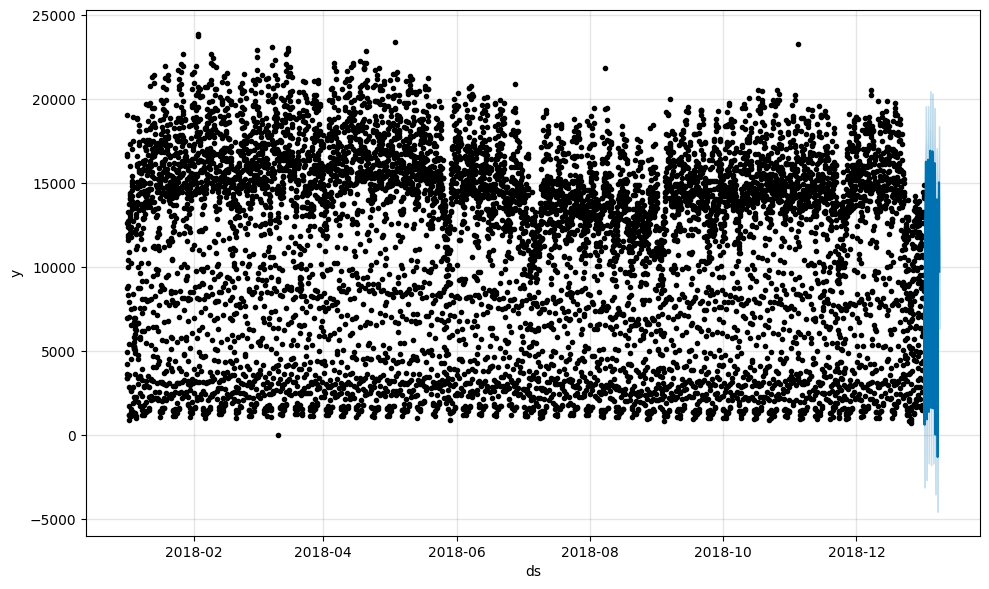

In [ ]:
plt = model.plot(forecast)